# Warranty Claims Fraud Prediction

The aim of this project is to analyze the warranty claims based on their region, product, claim value and other features to predict their authenticity. The dataset is taken from Kaggle. The dataset contains 358 rows and 21 columns. 

### Data Dictionary
| Column Name | Description |
| --- | --- |
|Unnamed: 0| Index|
|Region| Region of the claim|
|State| State of the claim|
|Area| Area of the claim|
|City| City of the claim|
|Consumer_profile| Consumer profile Business/Personal|
|Product_category| Product category Household/Entertainment|
|Product_type| Product type AC/TV|
|AC_1001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|Claim_Value| Claim value in INR|
|Service_Center| Service center code|
|Product_Age| Product age in days|
|Purchased_from| Purchased from - Dealer, Manufacturer, Internet|
|Call_details| Call duration|
|Purpose| Purpose of the call|
|Fraud| Fraudulent (1) or Genuine (0)|

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('df_Clean.csv')
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


## Data Preprocessing Part 1

In [3]:
# checking the shape of the dataset
df.shape

(358, 21)

In [4]:
# Drop index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Checking for null/missing values
df.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [6]:
# Checking for duplicate values
df.duplicated().sum()

0

In [7]:
# Checking the data types
df.dtypes

Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [8]:
# Unique values in each column
df.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [9]:
# renaming the values in product issue column
df['AC_1001_Issue'] = df['AC_1001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1002_Issue'] = df['AC_1002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1003_Issue'] = df['AC_1003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2001_Issue'] = df['TV_2001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2002_Issue'] = df['TV_2002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2003_Issue'] = df['TV_2003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})

#### Descriptive Statistics

In [10]:
df.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


In [11]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,No Issue,No Issue,No Issue,repair,replacement,No Issue,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,repair,repair,No Issue,No Issue,No Issue,No Issue,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,No Issue,repair,replacement,No Issue,No Issue,No Issue,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,No Issue,No Issue,No Issue,repair,repair,No Issue,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,No Issue,No Issue,No Issue,No Issue,repair,replacement,25000.0,15,6,Dealer,1.3,Claim,0


## Exploratory Data Analysis

### Location based Distribution of Fraudulent Claims

[Text(0.5, 1.0, 'Areawise Distribution of Fraudulent Claims')]

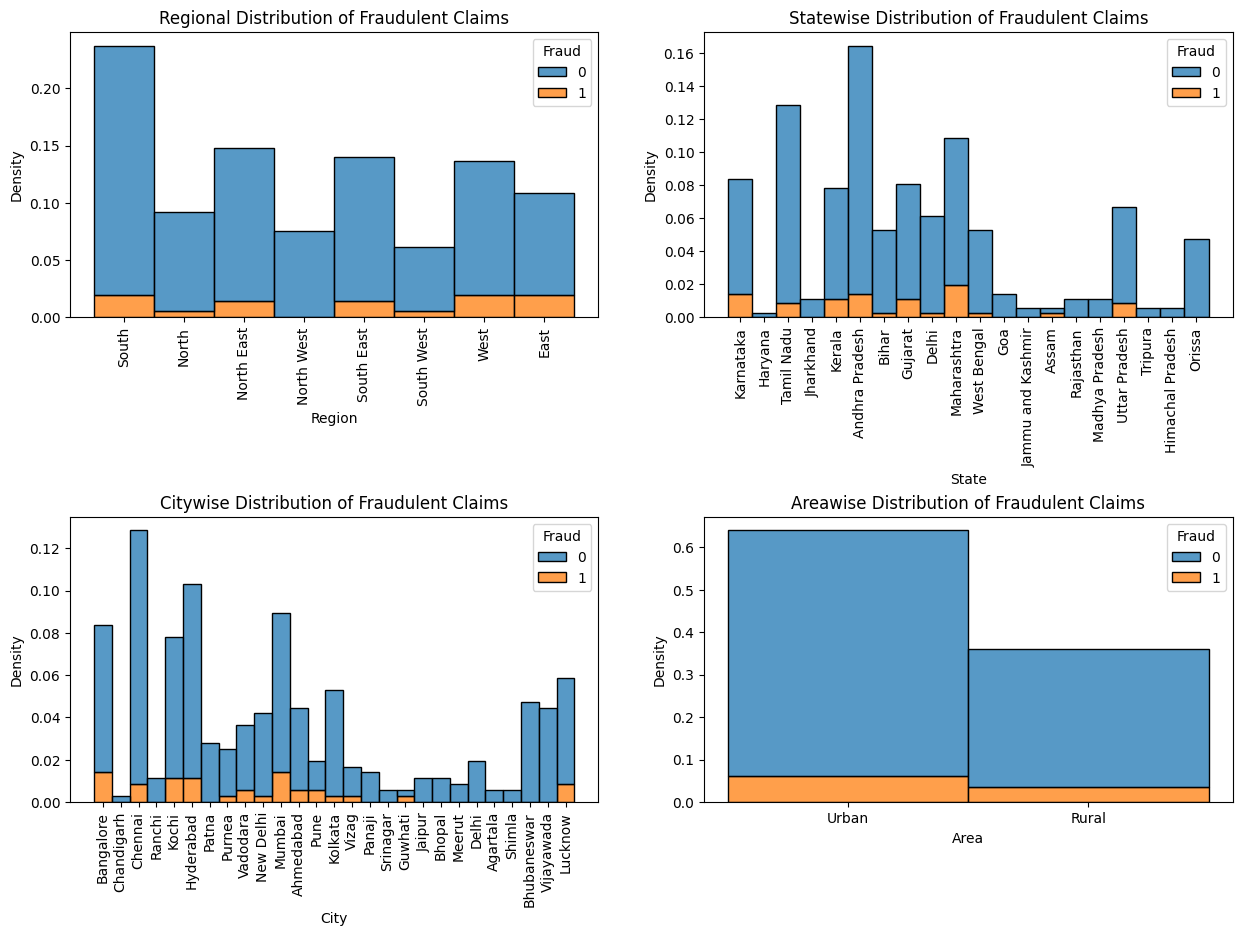

In [12]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = 'Region', data = df, ax =ax[0,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'State', data = df, ax =ax[0,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Statewise Distribution of Fraudulent Claims')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'City', data = df, ax =ax[1,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Citywise Distribution of Fraudulent Claims')
ax[1,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'Area', data = df, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Areawise Distribution of Fraudulent Claims')


The above plots visualizes the distribution of fraudulent claims based on location. The first graphs shpws the regional distribution of the fraudent claims, where South, North East and south East are among the regionas with highest warranty claims. However, the regions - West, East and South are among regions with highest fraudulent claims. Interestingly the North West region has zero fraudent claims. 

The second graph shows the distribution of fraudulent claims based on the States, where the states - Andhra Pradesh, Maharashtra, Tamil Nadu, Karnataka and Gujarat are among the states with highest number of warranty claims and states - Haryana has lowest warranty claims. The states - Andhra Pradesh, Maharashtra, Tamil Nadu, Karnataka and Gujarat are among the states with highest number of fraudulent claims whereas, states like Bihar, Delhi, West Bengal and Assam are among the states with lowest number of fraudulent claims.

The third graph shows the distribution of fraudulent claims based on cities. The cities - Chennai, Hyderabad, Bangalore, Mumbai and Kochi are among the cities with highest claims whereas cities like Chandigarh, Srinagar, Agartala and Shimla have lowest number of claims. Moreover the cities - Chennai, Hyderabad, Bangalore, Mumbai and Kochi are among the cities with highest fraudulent claims whereas cities like Chandigarh, Panaji, Meerut, Jaipur, and many other have zero fraudulent claims.

The forth graph, visualizes the fraudulent claims based on the area, where the urban area has more number of claims and ultimately more number of fraudulent claims in comparison to rural areas.

### Consumer Profile and Fraudulent Claims

Text(0.5, 1.0, 'Consumer Profile distribution')

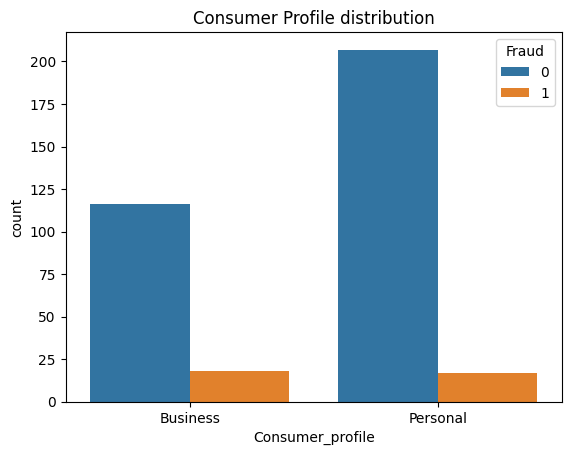

In [13]:
sns.countplot(x = 'Consumer_profile', data = df, hue = 'Fraud').set_title('Consumer Profile distribution')

From this graph, it is clear that majority of the claims are from consumer who purchased the products for personal use. However,the consumers who purchases the products for business purpose have higher number of fraudulent warranty claims.

### Product and Fraudulent Claims

Text(0.5, 1.0, 'Product and Fraud Distribution')

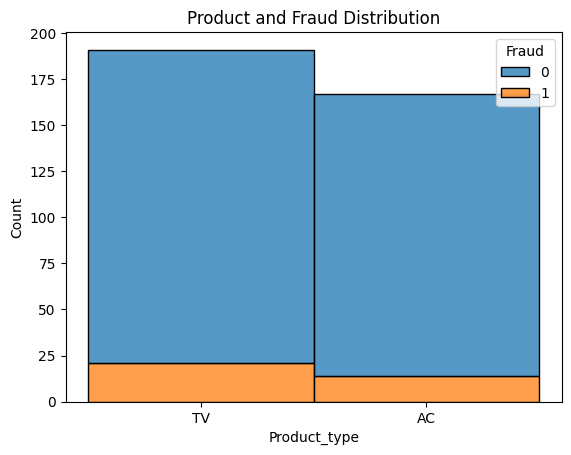

In [14]:
sns.histplot(x = 'Product_type', data = df, hue = 'Fraud', multiple='stack').set_title('Product and Fraud Distribution')

This graph shows that the company has higher sales for the TV as compared to the AC, and ultimately the number warranty claims for TV is higher than AC. Moreover, the number of fraudulent claims for TV is also higher than AC.

### Issue with the Product Parts and Fraudulent Claims

[Text(0.5, 1.0, 'TV_2003_Issue and Fraud Distribution')]

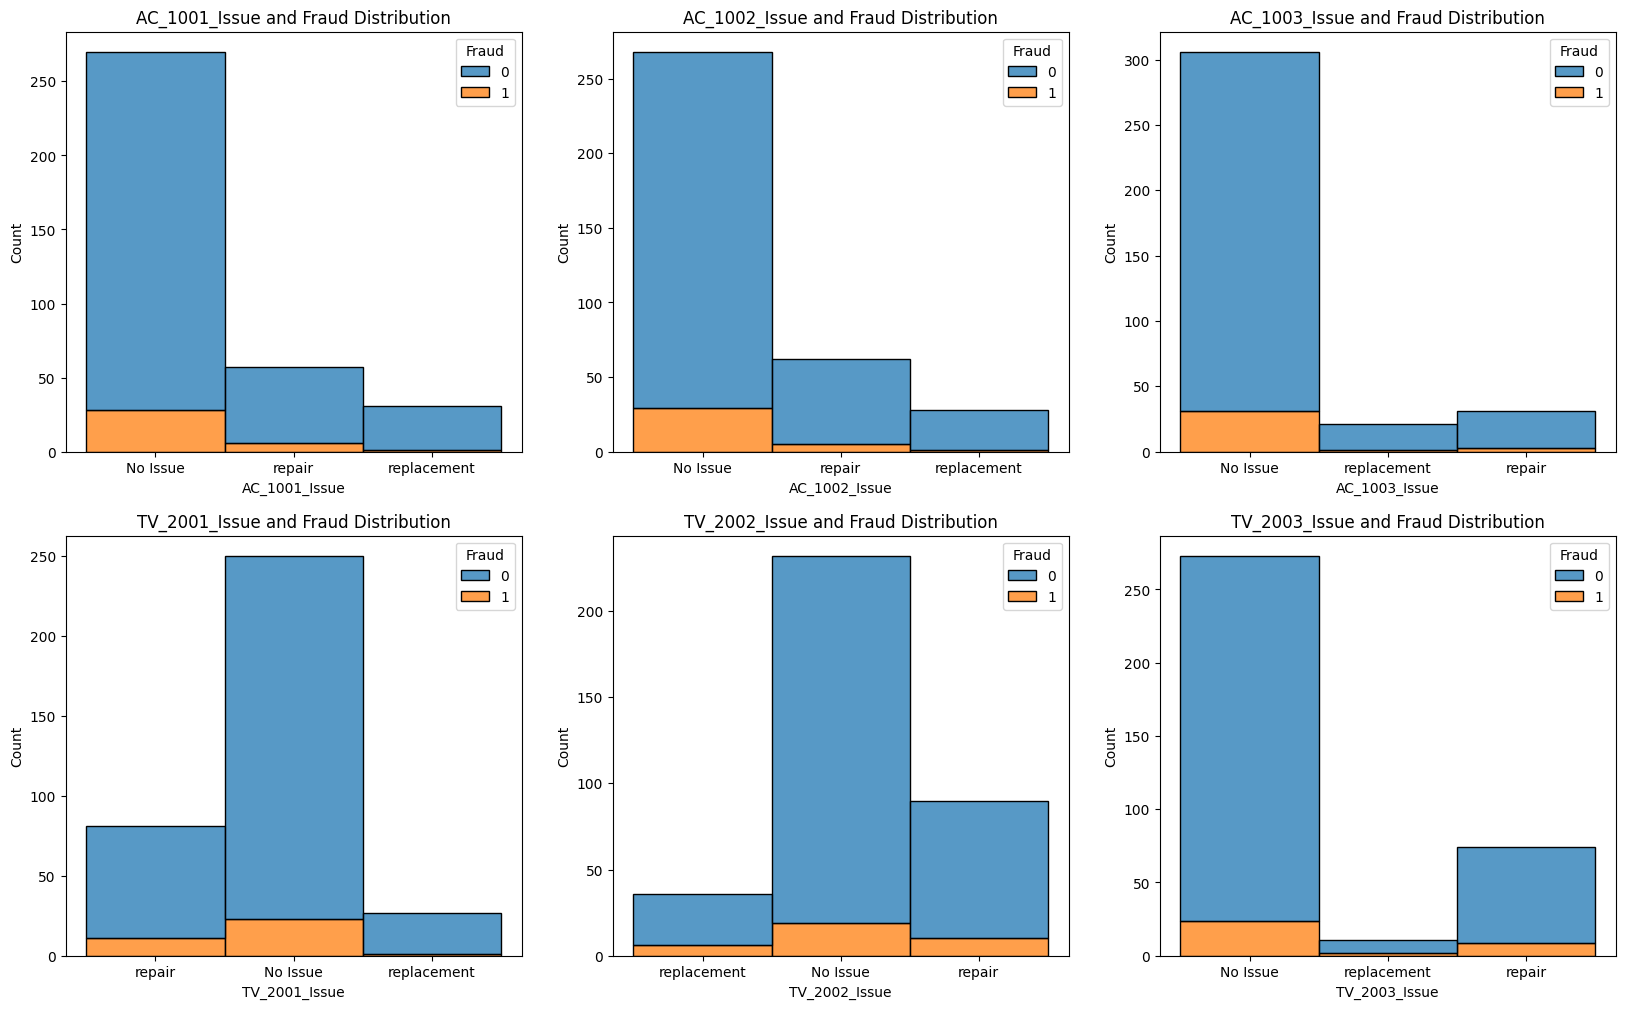

In [15]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.histplot(x = 'AC_1001_Issue', data = df, ax =ax[0,0], hue = 'Fraud', multiple='stack').set(title='AC_1001_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1002_Issue', data = df, ax =ax[0,1], hue = 'Fraud', multiple='stack').set(title='AC_1002_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1003_Issue', data = df, ax =ax[0,2], hue = 'Fraud', multiple='stack').set(title='AC_1003_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2001_Issue', data = df, ax =ax[1,0], hue = 'Fraud', multiple='stack').set(title='TV_2001_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2002_Issue', data = df, ax =ax[1,1], hue = 'Fraud', multiple='stack').set(title='TV_2002_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2003_Issue', data = df, ax =ax[1,2], hue = 'Fraud', multiple='stack').set(title='TV_2003_Issue and Fraud Distribution')

The above graphs visualizes the issue with the product parts and fradulent warranty claims on them. In the product AC the parts AC_1001 and AC_1002 has increases number of repairs whereas as the AC_1003 has considerable less instances of repair or replacement as compared to other two, so the company should focus on improving the AC_1001 and AC_1002 parts. Moreover, in all three parts, fradulent claims usually occurs when there is no issue with the product.

In the product TV the parts TV_2001 and TV_2002 has increases number of repairs whereas as the TV_1003 has considerable less instances of repair and negligible instances of replacement as compared to other two, however in contrast to AC, the fradulent claims usually occurs when there is issue with the product as well as when the product parts especially TV_2001 and TV_2002 requires repair or replacement. So the company should focus on improving the TV_2001 and TV_2002 parts, in order to reduce the number of fradulent claims.

### Service Center and Fraudulent Claims

Text(0.5, 1.0, 'Service Centre and Fraudulent Claims')

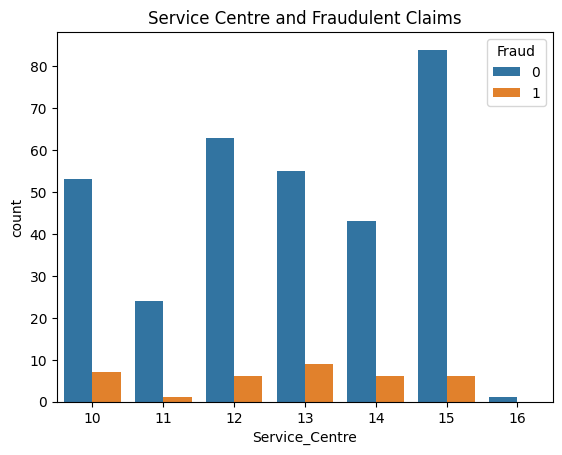

In [16]:
sns.countplot(x = 'Service_Centre', data = df, hue = 'Fraud').set_title('Service Centre and Fraudulent Claims')

This graoh shows the relation between the relationship between the service centre and the fraudulent warranty claims. The majorty of the replairs and replacements are done by the service centre 15,12 and 13. Where, the service centre 13 has the highest number of fradulent claims, followed by service centre 10. So, the company should survelliance the service centre 13 and 10 more closely.

### Claim Value and Fraudulent Claims

Text(0.5, 1.0, 'Claim Value and Fraudulent Claims')

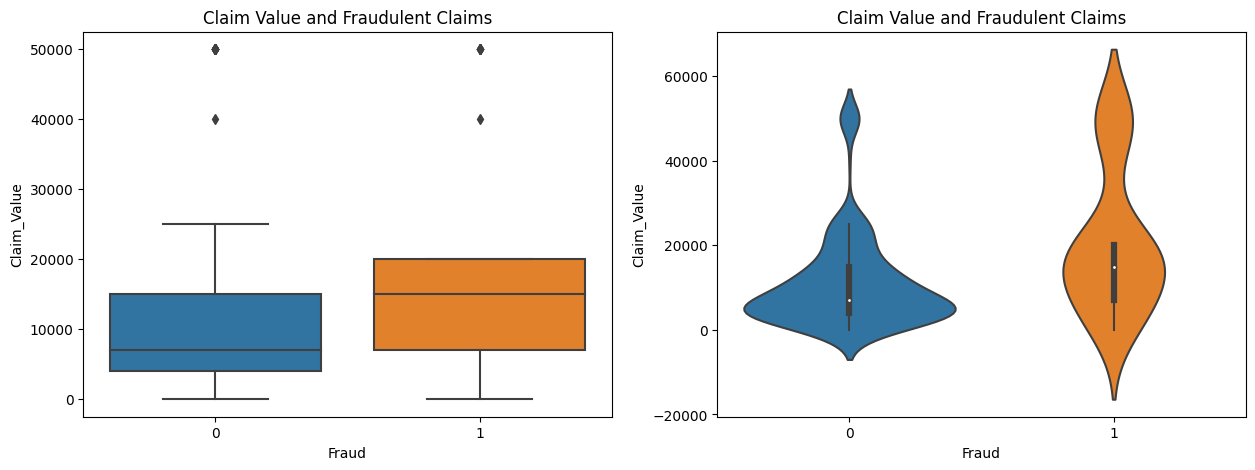

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[0]).set_title('Claim Value and Fraudulent Claims')

sns.violinplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[1]).set_title('Claim Value and Fraudulent Claims')

As expected, these graphs shows that the claim value for fradulent clains tends to be higher than the genuine claims. In the boxplot, the medianclaim value of fraudulent claims is way higher than the genuine claims. In addtion to that, it is clear form the boxplot that the fraudulent claims are more spread out at higher claim values than the genuine claims.

### Product Age and Fraudulent Claims

Text(0.5, 1.0, 'Product Age(in days) and Fraud Distribution')

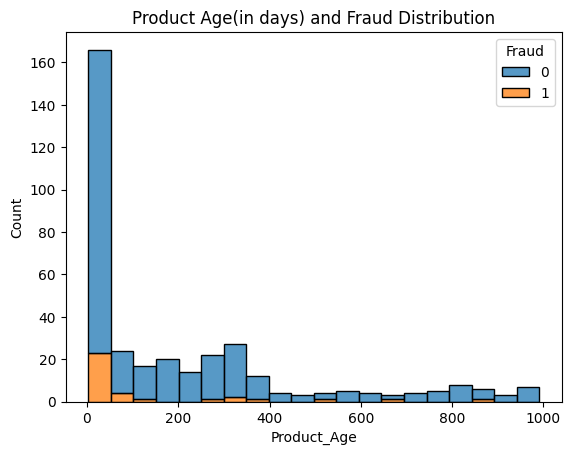

In [18]:
sns.histplot(x = 'Product_Age', data = df, hue = 'Fraud', multiple='stack', bins = 20).set_title('Product Age(in days) and Fraud Distribution')

From the above histogram, it is clear that majority of the warranty claims occur within 100 days of purchase. However, the fraudulent claims are more frequent and they usually occur within 50 days of purchase.

### Purchase point and Fraudulent Claims

Text(0.5, 1.0, 'Purchased from and Fraudulent Claims')

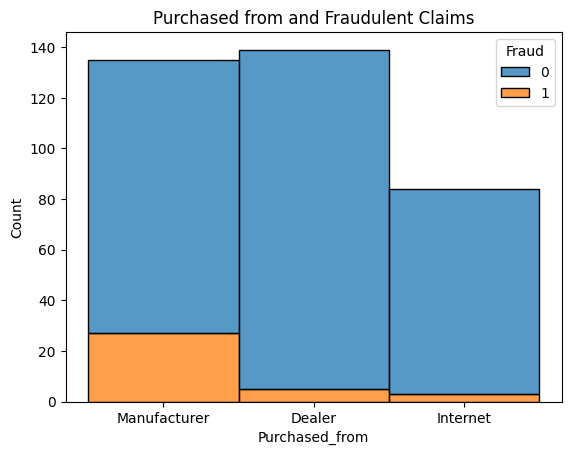

In [19]:
sns.histplot(x = 'Purchased_from', data = df, hue = 'Fraud', multiple='stack').set_title('Purchased from and Fraudulent Claims')

Maximum number of purchase is done through the dealer, but the maximum number of fraudulent claims are coming when the purchase is done through the manufacturer, whereas the internet has the lowest number of fraudulent claims. This much fradulent claims only from the manufacturer is a matter of concern for the company.

### Call Duration and Fraudulent Claims

Text(0.5, 0, 'Call Duration(in mins)')

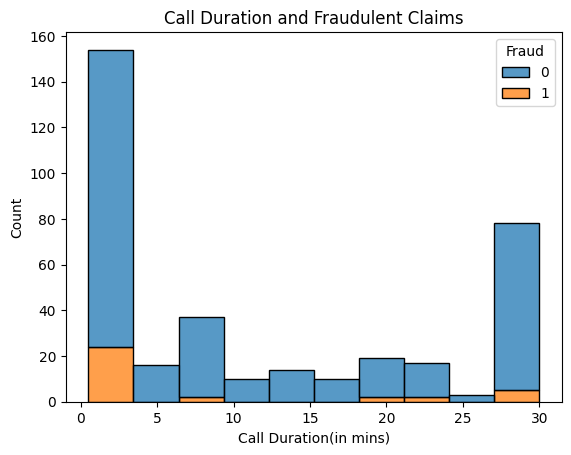

In [20]:
sns.histplot(x = 'Call_details', data = df, hue = 'Fraud', multiple='stack').set_title('Call Duration and Fraudulent Claims')
plt.xlabel('Call Duration(in mins)')

This graph shows the relation of customer care call duration and the fraudulent claims. In order to make a warranty claims, customers contact the customer care. The duration of customer care calls are plotted in the histogram along with the authenciity of the claims. The histogram shows that the fraudulent claims are more frequent when the customer care call duration is less than 3-4 minutes. However, the genuine claims are more frequent when the customer care call duration is more than 4 minutes.

### Purpose of contact and Fraudulent Claims

Text(0.5, 1.0, 'Purpose and Fraudulent Claims')

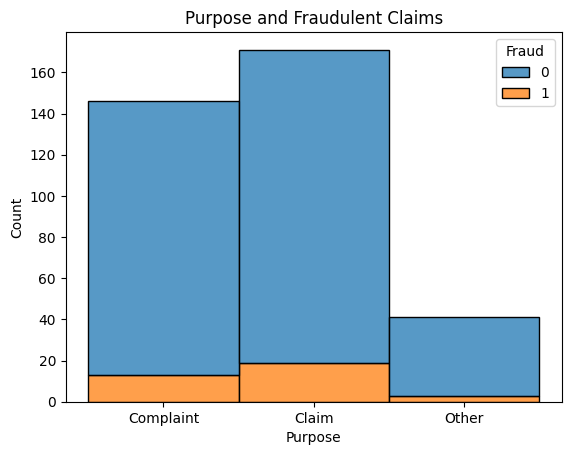

In [21]:
sns.histplot(x = 'Purpose', data = df, hue = 'Fraud', multiple='stack').set_title('Purpose and Fraudulent Claims')

Most of the customer contact the customer care for the purpose of complaint and claim and very few with other reasons. However, the fraudulent claims are more frequent when the customer contact the customer care for the purpose of complaint and claim.

## Data Preprocessing Part 2

### Outlier Removal

In [22]:
# Removing outliners from claim value column using IQR method

Q1 = df['Claim_Value'].quantile(0.25)
Q3 = df['Claim_Value'].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df['Claim_Value'] < (Q1 - 1.5 * IQR)) |(df['Claim_Value'] > (Q3 + 1.5 * IQR)))]

### Label Encoding the Object Datatypes

In [23]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Object
le = LabelEncoder()

# columns for label encoding
cols = df.select_dtypes(include=['object']).columns

# label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

Region [4 1 2 3 5 6 7 0]
State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area [1 0]
City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile [0 1]
Product_category [0 1]
Product_type [1 0]
AC_1001_Issue [0 1 2]
AC_1002_Issue [0 1 2]
AC_1003_Issue [0 2 1]
TV_2001_Issue [1 0 2]
TV_2002_Issue [2 0 1]
TV_2003_Issue [0 2 1]
Purchased_from [2 0 1]
Purpose [1 0 2]


## Correlation Matrix Heatmap

<Axes: >

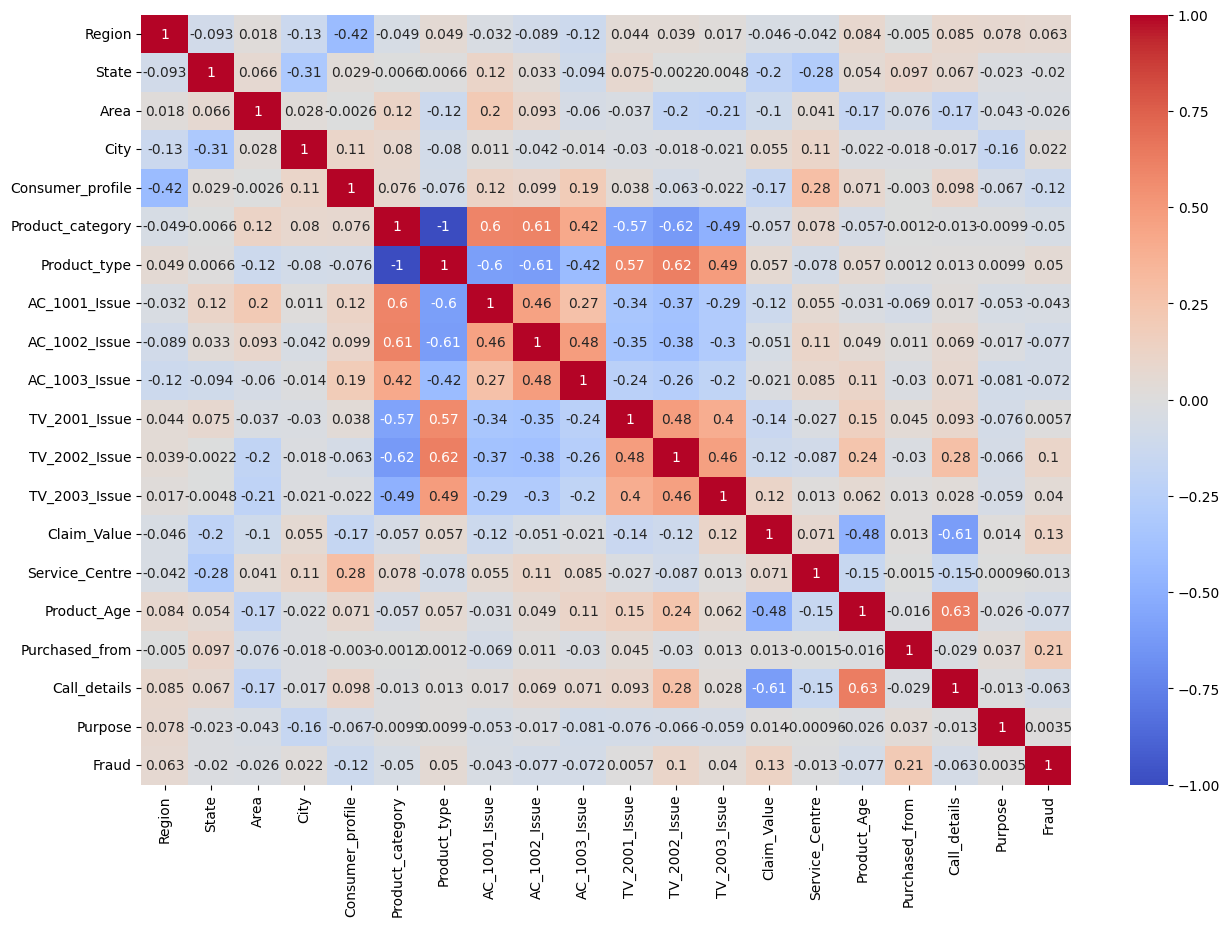

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud',axis=1), df['Fraud'], test_size=0.30, random_state=42)

## Model Building

I will be using the following classification models:
- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

Hyperparameter Tuning using GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Decision Tree Classifier
print(grid.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [28]:
#Best estimator for Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Decision Tree Classifier to the training data
dtree.fit(X_train,y_train)

#training accuracy
print(dtree.score(X_train,y_train))

#prediction on test data
d_pred = dtree.predict(X_test)

0.9313304721030042


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

Hyperparameter Tuning using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid = GridSearchCV(rfc, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Random Forest Classifier
print(grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [31]:
#random forest classifier with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Random Forest Classifier to the training data
rfc.fit(X_train,y_train)

#training accuracy
print(rfc.score(X_train,y_train))

#prediction on test data
r_pred = rfc.predict(X_test)

0.9184549356223176


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

#Fitting the Logistic Regression to the training data
lr.fit(X_train,y_train)

#training accuracy
print(lr.score(X_train,y_train))

#prediction on test data
l_pred = lr.predict(X_test)

0.9184549356223176


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation

### Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression')

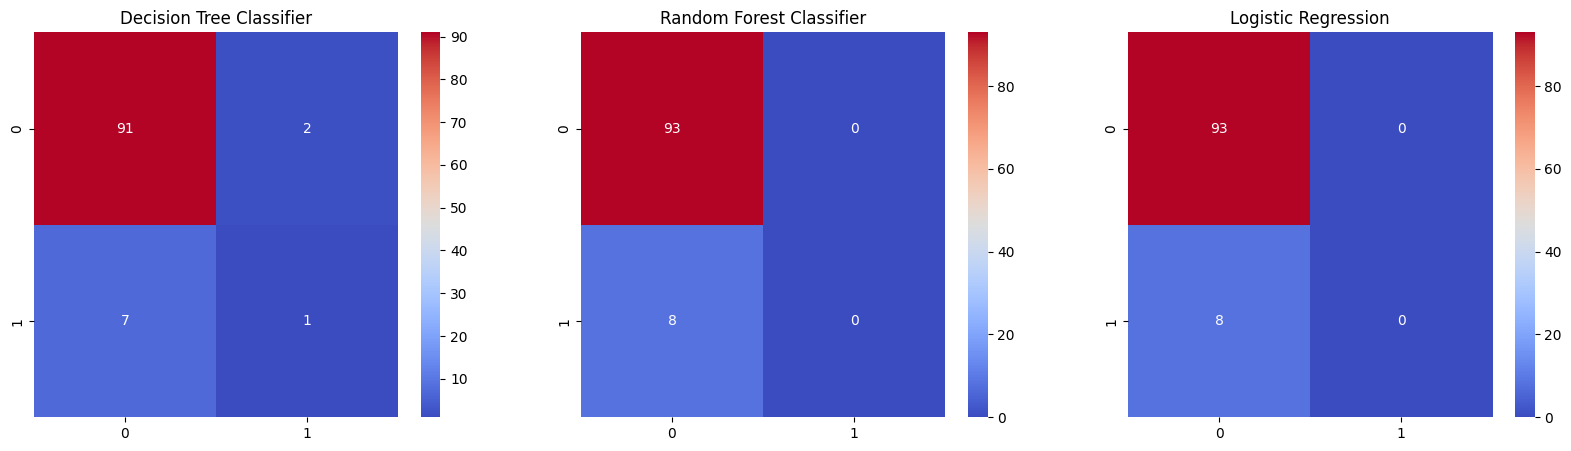

In [33]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

from sklearn.metrics import confusion_matrix

#confusion matrix for Decision Tree Classifier
sns.heatmap(confusion_matrix(y_test,d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree Classifier')

#confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test,r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest Classifier')

#confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test,l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

### Classification Report

In [34]:
from sklearn.metrics import classification_report

#classification report for Decision Tree Classifier
print(classification_report(y_test,d_pred))

#classification report for Random Forest Classifier
print(classification_report(y_test,r_pred))

#classification report for Logistic Regression
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.33      0.12      0.18         8

    accuracy                           0.91       101
   macro avg       0.63      0.55      0.57       101
weighted avg       0.88      0.91      0.89       101

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                           0.92       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.85      0.92      0.88       101

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                           0.92       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.85      0.92      0.88       101



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: U

In [35]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

print('==================== Decision Tree Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,d_pred))
print('R2 Score: ', r2_score(y_test,d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,d_pred))

print('==================== Random Forest Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,r_pred))
print('R2 Score: ', r2_score(y_test,r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,r_pred))

print('==================== Logistic Regression =========================')
print('Accuracy Score: ', accuracy_score(y_test,l_pred))
print('R2 Score: ', r2_score(y_test,l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,l_pred))


==================== Decision Tree Classifier ====================
Accuracy Score:  0.9108910891089109
R2 Score:  -0.2217741935483868
Mean Squared Error:  0.0891089108910891
==================== Random Forest Classifier ====================
Accuracy Score:  0.9207920792079208
R2 Score:  -0.08602150537634379
Mean Squared Error:  0.07920792079207921
==================== Logistic Regression =========================
Accuracy Score:  0.9207920792079208
R2 Score:  -0.08602150537634379
Mean Squared Error:  0.07920792079207921


## Feature Importance

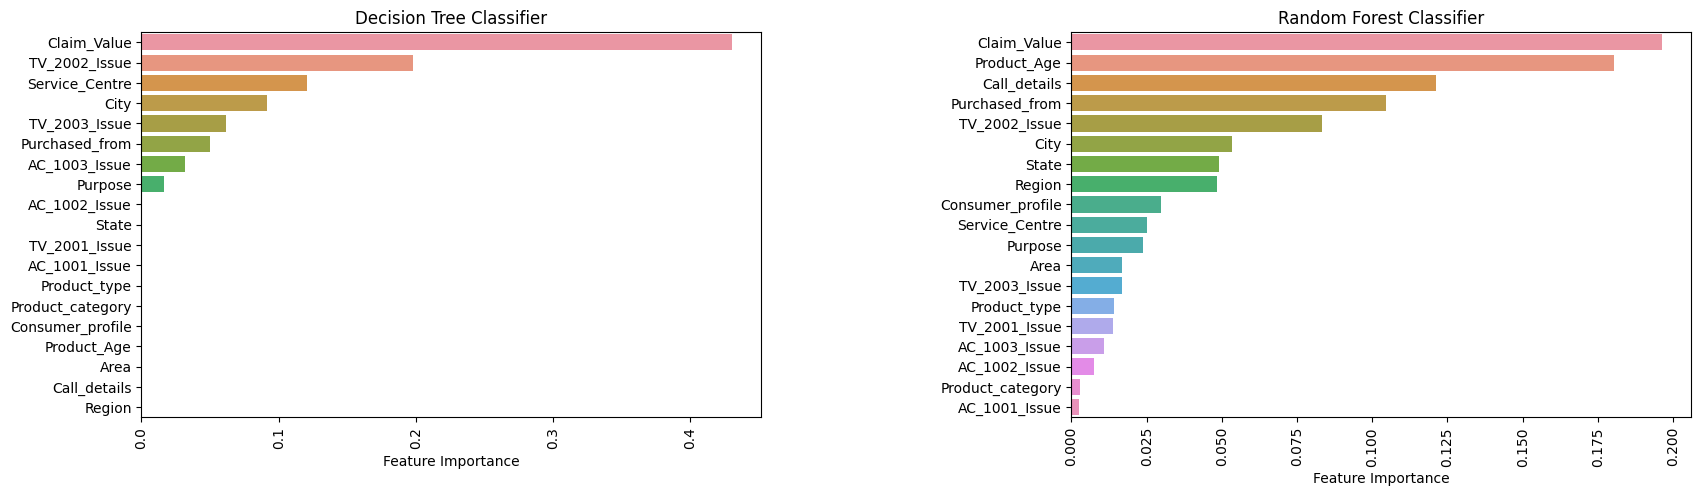

In [36]:
#feature importance for Decision Tree Classifier
feature_importance_d = pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_r = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(1,2,figsize=(20,5))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_d.index, x=feature_importance_d['Feature Importance'], ax=ax[0]).set_title('Decision Tree Classifier')
ax[0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_r.index, x=feature_importance_r['Feature Importance'], ax=ax[1]).set_title('Random Forest Classifier')
ax[1].xaxis.set_tick_params(rotation=90)

## Conclusion

From the exploratory data analysis, I have concluded that most of the warranty claims takes place in the southern region of India particularly in Andhra Pradesh and Tamil Nadu. Moreover, the fraudulent claims are more frequent in the cities like Hyderabad and Chennai whih are urban regions. The dataset includes the claims regarding two products i.e. TV and AC. The TVs had the higher warranty claims when they where purchased for personal purposes as compared to AC.

Moreover, in the case of Ac the fraudulent claims were made, when there was no issue in the AC parts. However, in the case of TV the fraudulent claims were made, when there was issue in the TV parts as well as when there was no issue in the TV parts. The fraudulent claims were more frequent when the purchase was made through the manufacturer. 

The fraudulent claims tend to have higher claim value as compared to the genuine ones, and the service centre 13 had the highest number of fraudulent claims despite of having lesser number of total warranty claims. It was also observed that the fraudulent claims were more frequent when the customer care call duration was less than 3-4 minutes. 


Coming to the machine learning models, I have used Decision Tree Classifier, Random Forest Classifier and Logistic Regression. All these models gave excellent accuracy of 91-92%. However, due to lesser number of fraudulent claims or small dataset size, the models have poor recall score for fraudulent claims. But this issue can be resolved by collecting more data.